In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import STL

In [204]:
electricity = pd.read_csv('Electric_Production.csv')

In [205]:
electricity.dtypes

DATE      object
Value    float64
dtype: object

In [206]:
electricity.DATE = pd.to_datetime(electricity.DATE)

In [207]:
electricity.DATE.isna().any()

False

In [208]:
electricity.DATE.count()

397

In [209]:
electricity

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


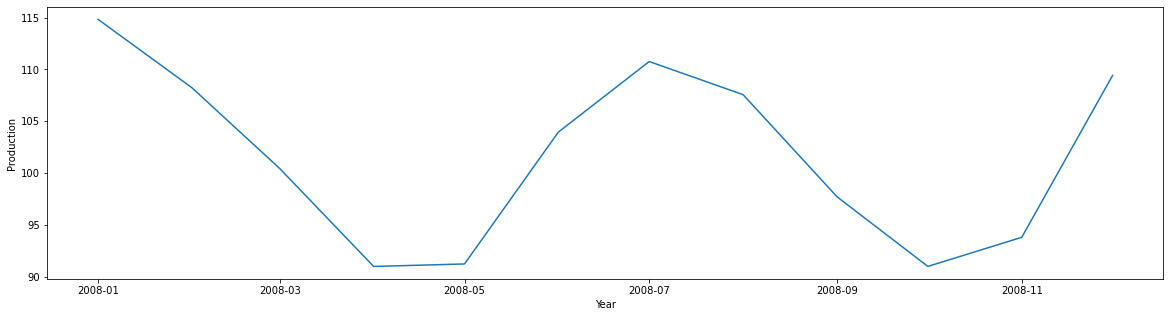

In [210]:
year_2008 = electricity[electricity.DATE.dt.year ==2008]

plt.figure(figsize=(20,5))
plt.plot(year_2008.DATE, year_2008.Value)

plt.xlabel("Year")
plt.ylabel("Production")

plt.show()

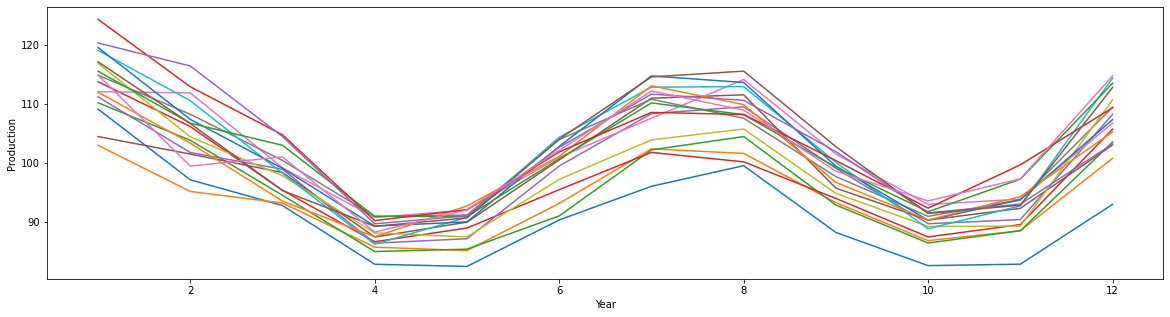

In [211]:
plt.figure(figsize=(20,5))

for year in range(2001,2018):
    current_year = electricity[electricity.DATE.dt.year == year]
    plt.plot(current_year.DATE.dt.month, current_year.Value)

plt.xlabel("Year")
plt.ylabel("Production")

plt.show()

In [212]:
electricity['year']=electricity.DATE.dt.year
electricity['month']=electricity.DATE.dt.month

In [213]:
electricity =electricity.drop(columns="DATE")

In [214]:
electricity

,Value,year,month
0,72.5052,1985,1
1,70.6720,1985,2
2,62.4502,1985,3
3,57.4714,1985,4
4,55.3151,1985,5
...,...,...,...
392,98.6154,2017,9
393,93.6137,2017,10
394,97.3359,2017,11
395,114.7212,2017,12


In [215]:
target = electricity.Value
attributes = electricity.drop(columns = ['Value'])

In [216]:
attributes_train,attributes_test, targets_train,targets_test = train_test_split(attributes,target,test_size = 0.2)

In [217]:
linear_algo = Ridge(alpha=10)
linear_algo.fit(attributes_train,targets_train)

Ridge(alpha=10)

In [218]:
linear_algo.score(attributes_train,targets_train)

0.7285829632027229

In [219]:
linear_algo.score(attributes_test,targets_test)

0.5902304735712947

In [220]:
test_pred = linear_algo.predict(attributes_test)

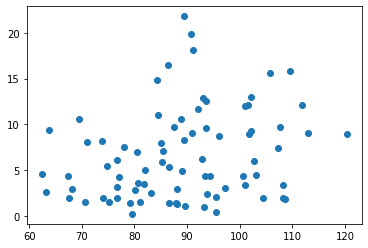

In [221]:
# plot the predictions and the targets test
plt.scatter(targets_test, np.abs(test_pred-targets_test))

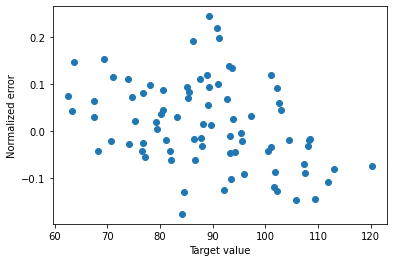

In [222]:
plt.scatter(targets_test, (test_pred-targets_test) /targets_test)

plt.xlabel("Target value")
plt.ylabel("Normalized error")
plt.show()

high bias because residuals are not random

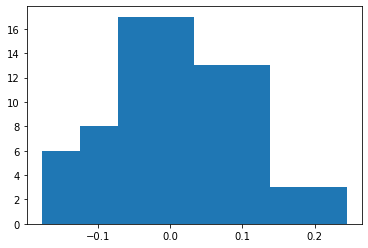

In [223]:
plt.hist(((test_pred-targets_test) / targets_test), bins="fd")
plt.show()

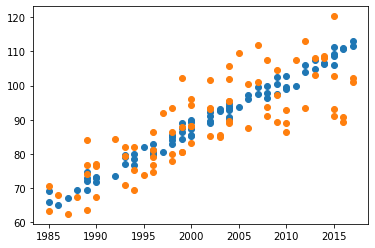

In [224]:
plt.scatter(attributes_test.year,test_pred,label = "test predictions")
plt.scatter(attributes_test.year,targets_test,label = "target")

In [225]:
electricity.shift(1)["Value"]
# shift buta zapisite nadolu ako e polojitelno chislo
# shift buta zapisite nagore ako e negativno chislo

0           NaN
1       72.5052
2       70.6720
3       62.4502
4       57.4714
         ...   
392    108.9312
393     98.6154
394     93.6137
395     97.3359
396    114.7212
Name: Value, Length: 397, dtype: float64

In [226]:
# this is linear correlation
electricity["Value"].corr(electricity.shift(1)["Value"])

0.8717308657532122

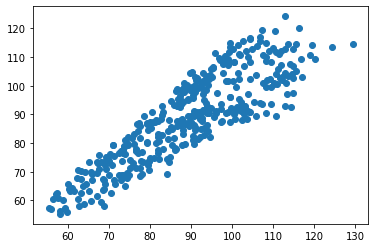

In [227]:
plt.scatter(electricity["Value"],electricity.shift(1)["Value"])

In [228]:
# show the correlation of the electricity value column
electricity["Value"].corr(electricity.shift(2)["Value"])

0.6465816539907929

In [229]:
electricity["Value"].corr(electricity.shift(3)["Value"])

0.5355867575850729

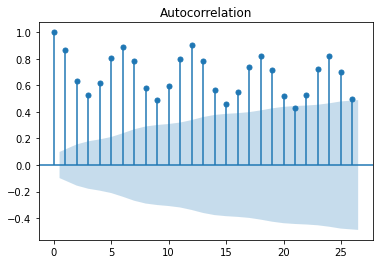

In [230]:
plot_acf(electricity.Value)
plt.show()

# strong periodicity on every 6 months so these are good predictions
# the blue zone is the confidence interval for error, 95 % CI
# if the value is in the blue zone we believe it is not significant

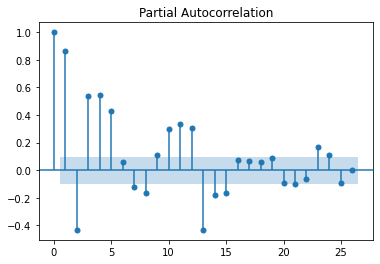

In [231]:
plot_pacf(electricity.Value)
plt.show()
# looking at the lags in the past
# difference between the previous and the current shifted value
# these are used in ARIMA models

In [232]:
for lag in range(24):
    electricity[f"lag_{lag}"] = electricity.Value.shift(lag)

In [233]:
# remove the nan values
electricity = electricity.dropna()

In [234]:
target = electricity.Value
attributes = electricity.drop(columns = ['Value'])
attributes_train,attributes_test, targets_train,targets_test = train_test_split(attributes,target,test_size = 0.2,random_state=33)

In [235]:
pca = PCA(n_components= 0.98)

In [236]:
pca.fit(attributes_train)

PCA(n_components=0.98)

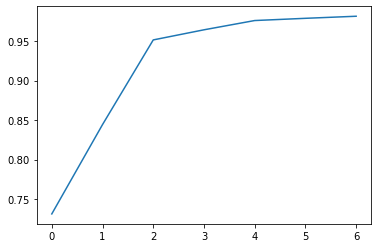

In [237]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [238]:
linear_ar_model = Ridge(
    alpha =10
)
linear_ar_model.fit(attributes_train,targets_train)

Ridge(alpha=10)

In [239]:
linear_ar_model.score(attributes_train,targets_train)

0.9999990871680084

In [240]:
linear_ar_model.score(attributes_test,targets_test)

0.9999987387253423

In [241]:
test_pred = linear_ar_model.predict(attributes_test)

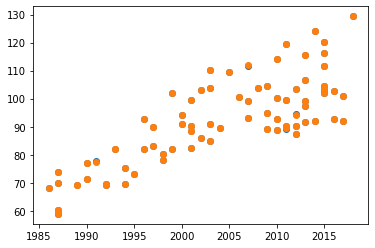

In [242]:
plt.scatter(attributes_test.year,test_pred,label = "test predictions")
plt.scatter(attributes_test.year,targets_test,label = "target")

In [243]:
electricity

,Value,year,month,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
23,68.1354,1986,12,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,59.9005,...,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720,72.5052
24,73.8152,1987,1,73.8152,68.1354,59.3417,57.5322,61.0005,64.4816,65.7655,...,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502,70.6720
25,70.0620,1987,2,70.0620,73.8152,68.1354,59.3417,57.5322,61.0005,64.4816,...,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714,62.4502
26,65.6100,1987,3,65.6100,70.0620,73.8152,68.1354,59.3417,57.5322,61.0005,...,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151,57.4714
27,60.1586,1987,4,60.1586,65.6100,70.0620,73.8152,68.1354,59.3417,57.5322,...,67.9869,73.3057,68.7145,58.0005,56.3154,60.5846,63.2485,62.6202,58.0904,55.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,98.6154,2017,9,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,101.0396,...,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628,91.5959
393,93.6137,2017,10,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,88.3530,...,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203,93.0628
394,97.3359,2017,11,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,92.0805,...,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837,103.2203
395,114.7212,2017,12,114.7212,97.3359,93.6137,98.6154,108.9312,112.1538,102.1532,...,91.4867,102.7637,115.5159,114.5397,104.0375,90.7369,89.3254,95.3548,106.6688,117.0837


In [244]:
linear_ar_model.coef_

array([-3.87482556e-04,  1.33681976e-03,  9.94620932e-01,  3.30966933e-03,
       -5.14999388e-04,  6.38012440e-04, -1.65528185e-04,  6.11029034e-05,
       -1.23362975e-04, -2.82657909e-05, -5.00703031e-04, -4.78341143e-05,
        2.23700107e-04,  2.76723015e-04,  2.85340739e-03, -1.52730442e-03,
        7.47769818e-04, -8.68431118e-04,  2.06421279e-04,  7.12161213e-04,
       -4.82443562e-05,  5.92936233e-04, -2.31792271e-04, -5.56292657e-04,
        4.39040493e-06,  3.92754384e-04])

In [245]:
# performing trend,seasonality check
stl = STL(
    electricity.Value,
    period = 12
)

In [246]:
# fit the result
result = stl.fit()

<Figure size 1584x720 with 0 Axes>

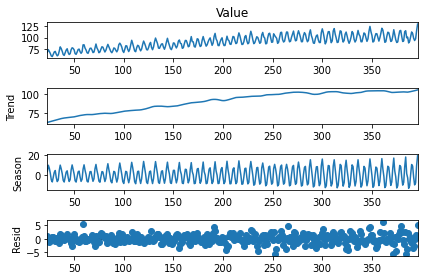

In [247]:
plt.figure(figsize=(22,10))
result.plot()
plt.show()
# here is show the trend

In [248]:
sales = pd.read_csv("sales_train.csv")
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [249]:
sales.date = pd.to_datetime(sales.date)

In [250]:
sales.shop_id.unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36], dtype=int64)

In [251]:
sales.shop_id.value_counts()

31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     53227
24     53032
53     52921
16     52734
30     50860
29     49225
38     46013
22     45434
51     44433
52     43502
59     42108
41     41967
37     39638
44     39530
43     39282
4      38242
5      38179
14     36979
45     35891
55     34769
12     34694
2      25991
3      25532
17     22950
48     21612
10     21397
13     17824
49     15849
39     13440
0       9857
32      7947
23      6963
34      5752
1       5678
33      5027
40      4257
9       3751
8       3412
20      1792
11       499
36       306
Name: shop_id, dtype: int64

In [252]:
sales[(sales.shop_id == 31) & (sales.date == "2013/07/01")].sum()

date_block_num          0.00
shop_id              8897.00
item_id           3290384.00
item_price         143349.25
item_cnt_day          312.00
dtype: float64

In [253]:
shop_31 = sales[sales.shop_id == 31]

In [256]:
total_counts = shop_31.groupby("date").item_cnt_day.sum()

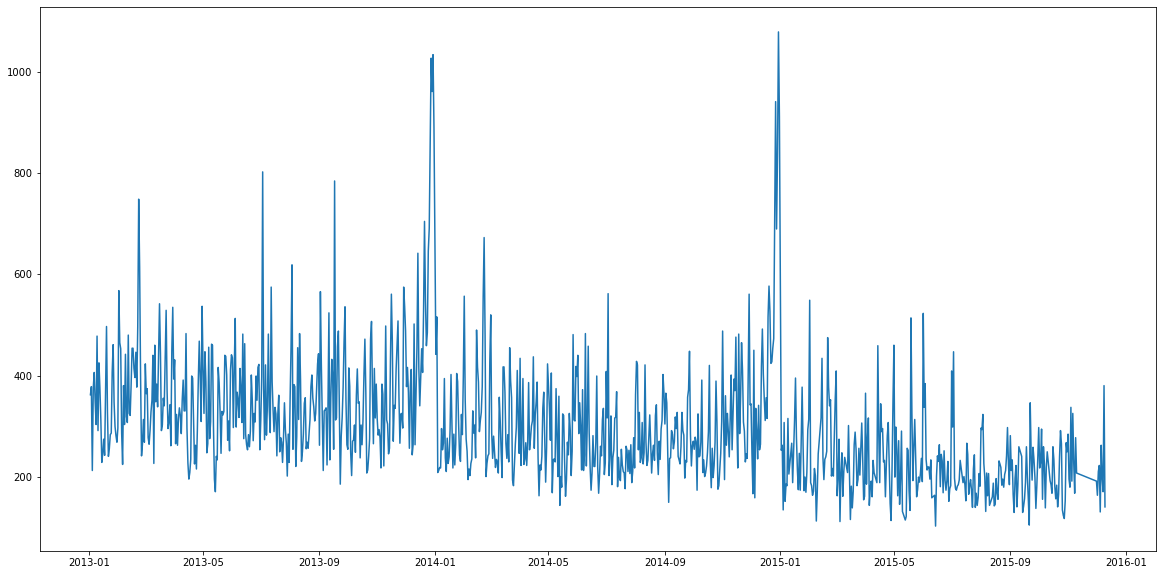

In [259]:
plt.figure(figsize = (20,10))
plt.plot(total_counts.index, total_counts)
plt.show()

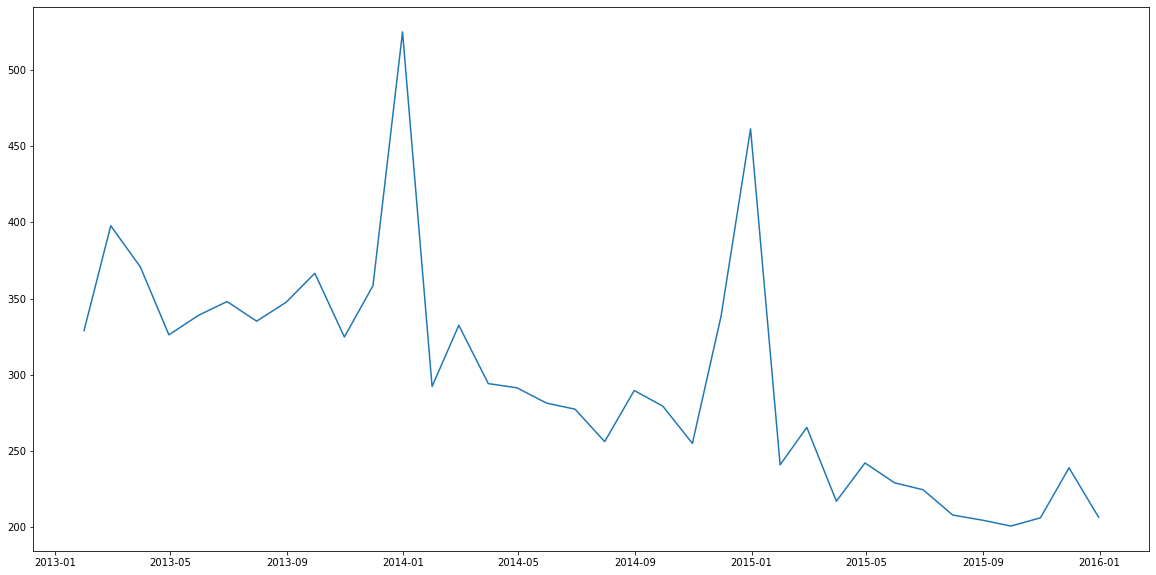

In [263]:
monthly_mean_ = total_counts.resample("1M").mean()
plt.figure(figsize = (20,10))
plt.plot(monthly_mean_.index, monthly_mean_)
plt.show()

In [267]:
# rolling means for 7 days
rolling_means = total_counts.rolling(7).mean().dropna()

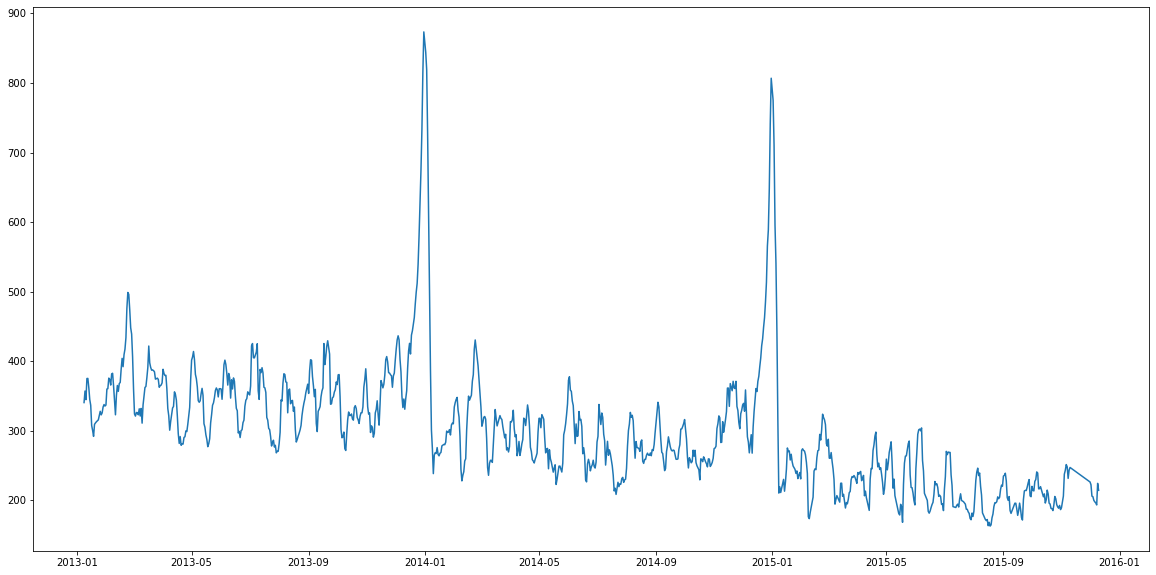

In [268]:
# monthly_mean_ = total_counts.resample("1M").mean()
plt.figure(figsize = (20,10))
plt.plot(rolling_means.index, rolling_means)
plt.show()

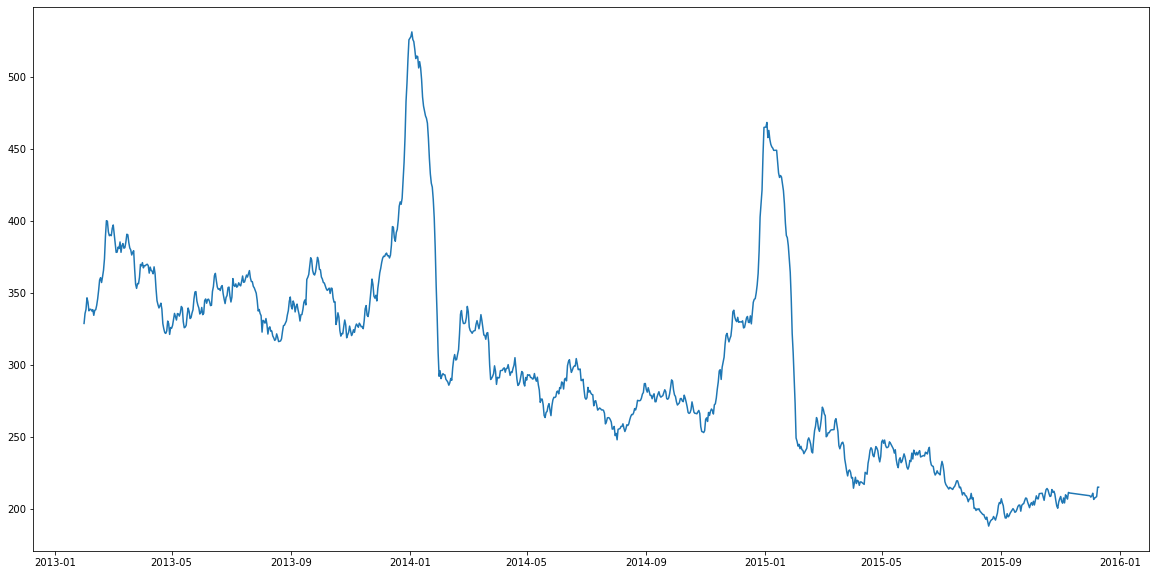

In [270]:
# rolling means for thirty days 
rolling_means_thirty_days = total_counts.rolling(30).mean().dropna()
plt.figure(figsize = (20,10))
plt.plot(rolling_means_thirty_days.index, rolling_means_thirty_days)
plt.show()

In [271]:
sales.item_id.nunique() #high cardinality 

21807

In [275]:
shop_31 = shop_31.sort_values(['item_id','date']).reset_index(drop = True)

In [277]:
shop_31 = shop_31.drop(columns = ['date_block_num'])

In [280]:
shop_31.item_id.value_counts()

20949    863
5822     602
17717    478
7856     436
4181     400
        ... 
549        1
3124       1
5175       1
8476       1
6339       1
Name: item_id, Length: 14416, dtype: int64

In [281]:
shop_31_item_20949 = shop_31[shop_31.item_id == 20949]

In [282]:
shop_31_item_20949

,date,shop_id,item_id,item_price,item_cnt_day
224196,2013-01-05,31,20949,5.0,1.0
224197,2013-01-06,31,20949,5.0,29.0
224198,2013-01-07,31,20949,5.0,29.0
224199,2013-01-08,31,20949,5.0,22.0
224200,2013-01-09,31,20949,5.0,41.0
...,...,...,...,...,...
225054,2015-12-06,31,20949,5.0,23.0
225055,2015-12-07,31,20949,5.0,12.0
225056,2015-12-08,31,20949,5.0,19.0
225057,2015-12-09,31,20949,5.0,26.0


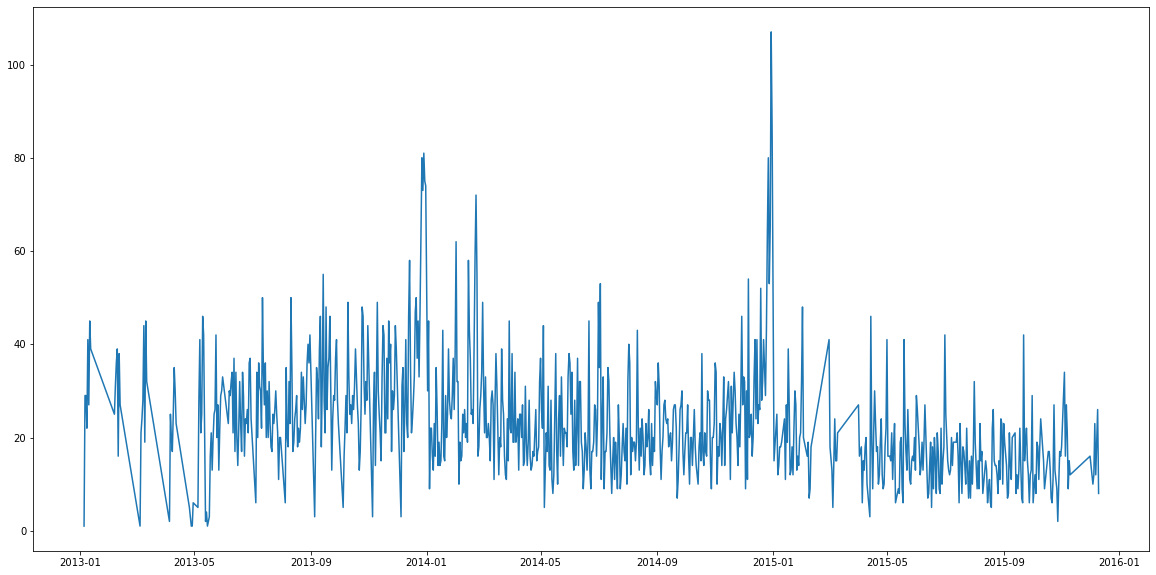

In [287]:
# filling missing data with ffill or bfill
plt.figure(figsize = (20,10))
plt.plot(shop_31_item_20949.date,shop_31_item_20949.item_cnt_day)
plt.show()

In [289]:
shop_31_item_20949.date.diff()

224196      NaT
224197   1 days
224198   1 days
224199   1 days
224200   1 days
          ...  
225054   1 days
225055   1 days
225056   1 days
225057   1 days
225058   1 days
Name: date, Length: 863, dtype: timedelta64[ns]